# Barebones example

In [18]:
in_path = 'C:\\Annexe_D\\PER\\data'
in_info_path = 'C:\\Annexe_D\\PER\\in_info'

In [19]:
superclass = {
    "fish": {
        "great_white_shark": "n01484850",
        "goldfish": "n01443537",
        "hammerhead": "n01494475",
        "lionfish": "n02643566",
    },
    "mammal": {
        "grey_whale": "n02066245",
        "killer_whale": "n02071294",
        "Indian_elephant": "n02504013",
        "bison": "n02410509",
        "Arabian_camel": "n02437312",
        "lesser_panda": "n02509815",
        "giant_panda": "n02510455",
        "hippopotamus": "n02398521",
    },
    "bird": {
        "pelican": "n02051845",
        "great_grey_owl": "n01622779",
        "hummingbird": "n01833805",
        "hornbill": "n01829413",
        "bee_eater": "n01828970",
        "coucal": "n01824575",
        "lorikeet": "n01820546",
        "macaw": "n01818515",
        "sulphur-crested_cockatoo": "n01819313",
        "toucan": "n01843383",
        "red-breasted_merganser": "n01855032",
        "goose": "n01855672",
        "black_swan": "n01860187",
        "bald_eagle": "n01614925",
        "hen": "n01514859",
        "albatross": "n02058221",
    },
    "feline": {
        "leopard": "n02128385",
        "lynx": "n02127052",
        "cougar": "n02125311",
        "Siamese_cat": "n02123597",
        "tiger": "n02129604",
        "lion": "n02129165",
        "tiger_cat": "n02123159",
    },
    "canine": {
        "beagle": "n02088364",
        "basset": "n02088238",
    },
    "primate": {
        "indri": "n02500267",
        "capuchin": "n02492035",
        "baboon": "n02486410",
        "macaque": "n02487347",
        "chimpanzee": "n02481823",
        "gorilla": "n02480855",
        "orangutan": "n02480495",
    },
    "reptile": {
        "rock_python": "n01744401",
    },
    "ungulate": {
        "zebra": "n02391049",
    },
    "aquatic": {
        "great_white_shark": "n01484850",
        "goldfish": "n01443537",
        "hammerhead": "n01494475",
        "lionfish": "n02643566",
        "grey_whale": "n02066245",
        "killer_whale": "n02071294",
    },
    "terrestrial": {
        "hippopotamus": "n02398521",
        "Indian_elephant": "n02504013",
        "bison": "n02410509",
        "Arabian_camel": "n02437312",
        "lesser_panda": "n02509815",
        "giant_panda": "n02510455",
        "leopard": "n02128385",
        "lynx": "n02127052",
        "cougar": "n02125311",
        "Siamese_cat": "n02123597",
        "tiger": "n02129604",
        "lion": "n02129165",
        "tiger_cat": "n02123159",
        "beagle": "n02088364",
        "basset": "n02088238",
        "indri": "n02500267",
        "capuchin": "n02492035",
        "baboon": "n02486410",
        "macaque": "n02487347",
        "chimpanzee": "n02481823",
        "gorilla": "n02480855",
        "orangutan": "n02480495",
        "zebra": "n02391049",
        #"rock_python": "n01744401",
    }
}

### Recover ImageNet hierarchy

In [20]:
from robustness.tools.imagenet_helpers import ImageNetHierarchy

in_hier = ImageNetHierarchy(in_path,
                            in_info_path)

In [21]:
def generate_superclass_dictionary(all_superclass : dict) :
    superclass_keys = list(all_superclass.keys())
    index_to_superclass = {}
    for i in range(len(superclass_keys)) :
        key = superclass_keys[i]
        index_to_superclass[i] = key
    return index_to_superclass

### Create dataset and loader

In [22]:
bird_superclass = list(superclass["bird"].values())
terrestrial_superclass = list(superclass["terrestrial"].values())
aquatic_superclass = list(superclass["aquatic"].values())

In [23]:
all_superclass = {
    "bird": bird_superclass,
    "terrestrial": terrestrial_superclass,
    "aquatic": aquatic_superclass
}
index_to_superclass = generate_superclass_dictionary(all_superclass)
print(index_to_superclass)

{0: 'bird', 1: 'terrestrial', 2: 'aquatic'}


In [24]:
import sys, os
dir = "C:\Annexe_D\PER\data\\train"
if sys.version_info >= (3, 5):
    classes = [d.name for d in os.scandir(dir) if d.is_dir()]
else:
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
classes.sort()
class_to_idx = {classes[i]: i for i in range(len(classes))}
print("class_to_idx")
print(class_to_idx)

class_to_idx
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}


In [25]:
set_bird = {class_to_idx[identifiant] for identifiant in bird_superclass if identifiant in class_to_idx}
set_terrestre = {class_to_idx[identifiant] for identifiant in terrestrial_superclass if identifiant in class_to_idx}
set_aquatic = {class_to_idx[identifiant] for identifiant in aquatic_superclass if identifiant in class_to_idx}

In [26]:
liste_de_sets = [set_bird, set_terrestre, set_aquatic]

In [27]:
print(liste_de_sets)

[{3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}, {0, 1, 2, 45, 20, 21}]


In [28]:
from robustness import datasets

custom_dataset = datasets.CustomImageNet(in_path,
                                         liste_de_sets)

In [29]:
train_loader, test_loader = custom_dataset.make_loaders(workers=4,
                                                        batch_size=5)

print(f"Train set size: {len(train_loader.dataset.targets)}")
print(f"Test set size: {len(test_loader.dataset.targets)}")

==> Preparing dataset custom_imagenet..
class_to_idx
{'n01443537': 0, 'n01484850': 1, 'n01494475': 2, 'n01514859': 3, 'n01614925': 4, 'n01622779': 5, 'n01744401': 6, 'n01818515': 7, 'n01819313': 8, 'n01820546': 9, 'n01824575': 10, 'n01828970': 11, 'n01829413': 12, 'n01833805': 13, 'n01843383': 14, 'n01855032': 15, 'n01855672': 16, 'n01860187': 17, 'n02051845': 18, 'n02058221': 19, 'n02066245': 20, 'n02071294': 21, 'n02088238': 22, 'n02088364': 23, 'n02123159': 24, 'n02123597': 25, 'n02125311': 26, 'n02127052': 27, 'n02128385': 28, 'n02129165': 29, 'n02129604': 30, 'n02391049': 31, 'n02398521': 32, 'n02410509': 33, 'n02437312': 34, 'n02480495': 35, 'n02480855': 36, 'n02481823': 37, 'n02486410': 38, 'n02487347': 39, 'n02492035': 40, 'n02500267': 41, 'n02504013': 42, 'n02509815': 43, 'n02510455': 44, 'n02643566': 45}
aaaaa
['n01443537', 'n01484850', 'n01494475', 'n01514859', 'n01614925', 'n01622779', 'n01744401', 'n01818515', 'n01819313', 'n01820546', 'n01824575', 'n01828970', 'n01829413'

In [30]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    print(lab)

tensor([1, 0, 1, 0, 2])
tensor([1, 1, 1, 1, 1])
tensor([0, 1, 1, 1, 0])
tensor([2, 1, 1, 0, 1])
tensor([2, 1, 0, 2, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0036667918..0.94390136].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0010341107..1.0013444].


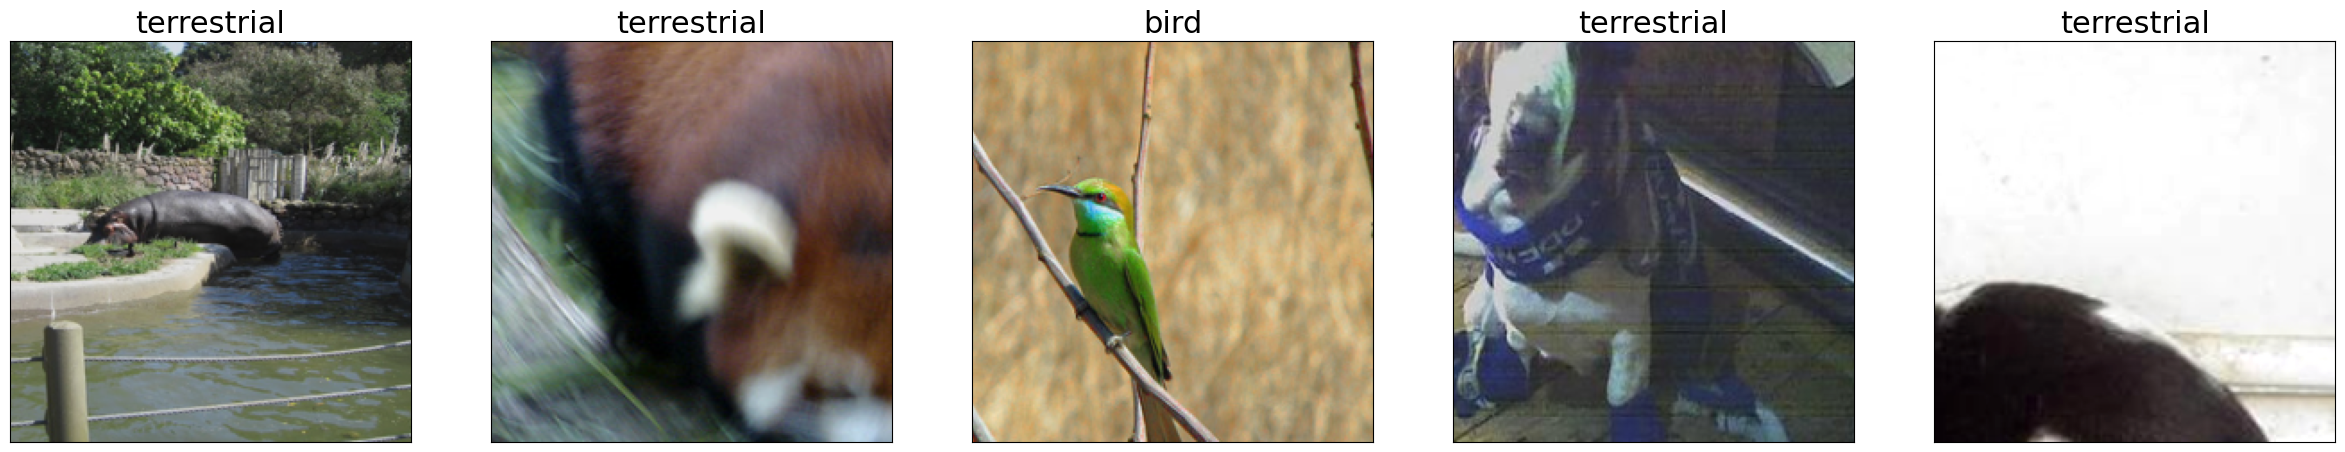

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00087260106..0.94806325].


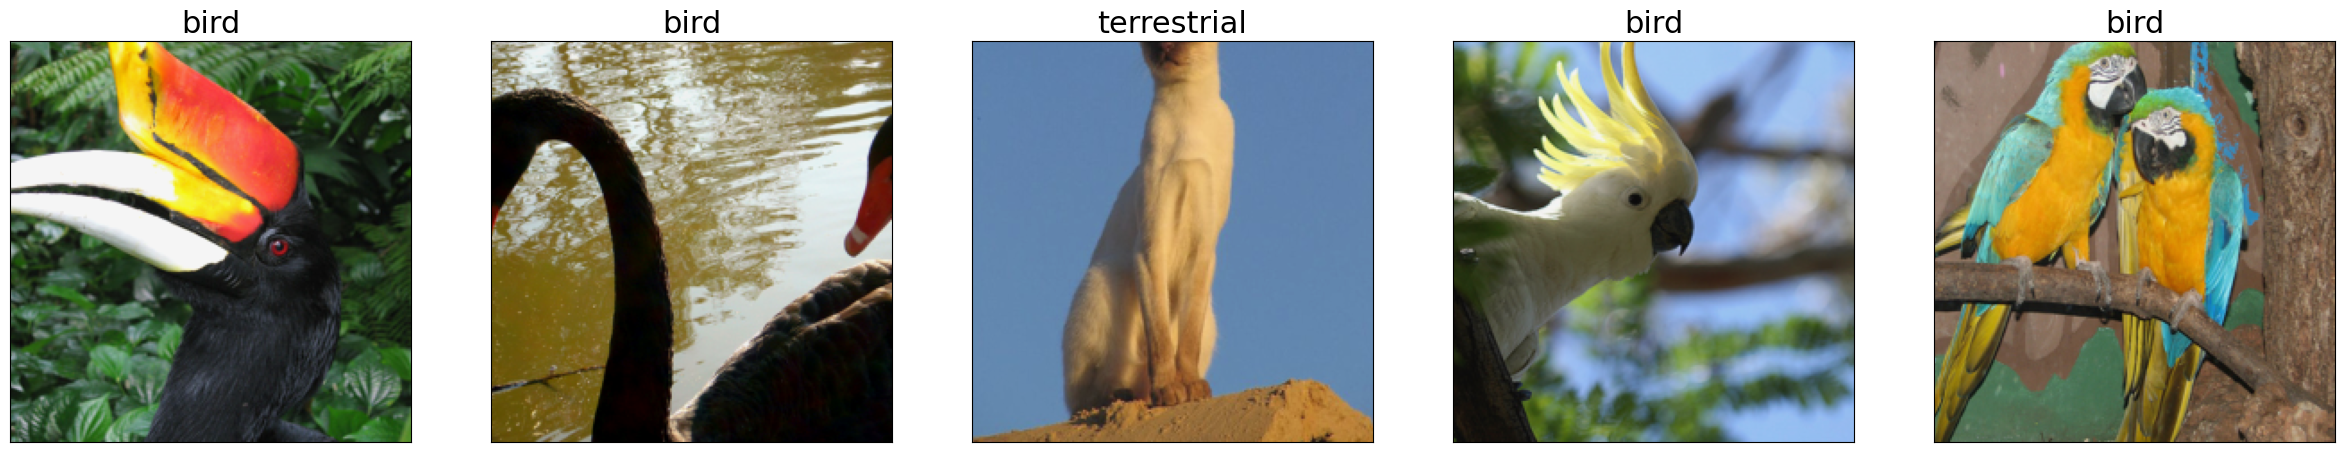

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004274999..1.0004275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00044686985..0.9611818].


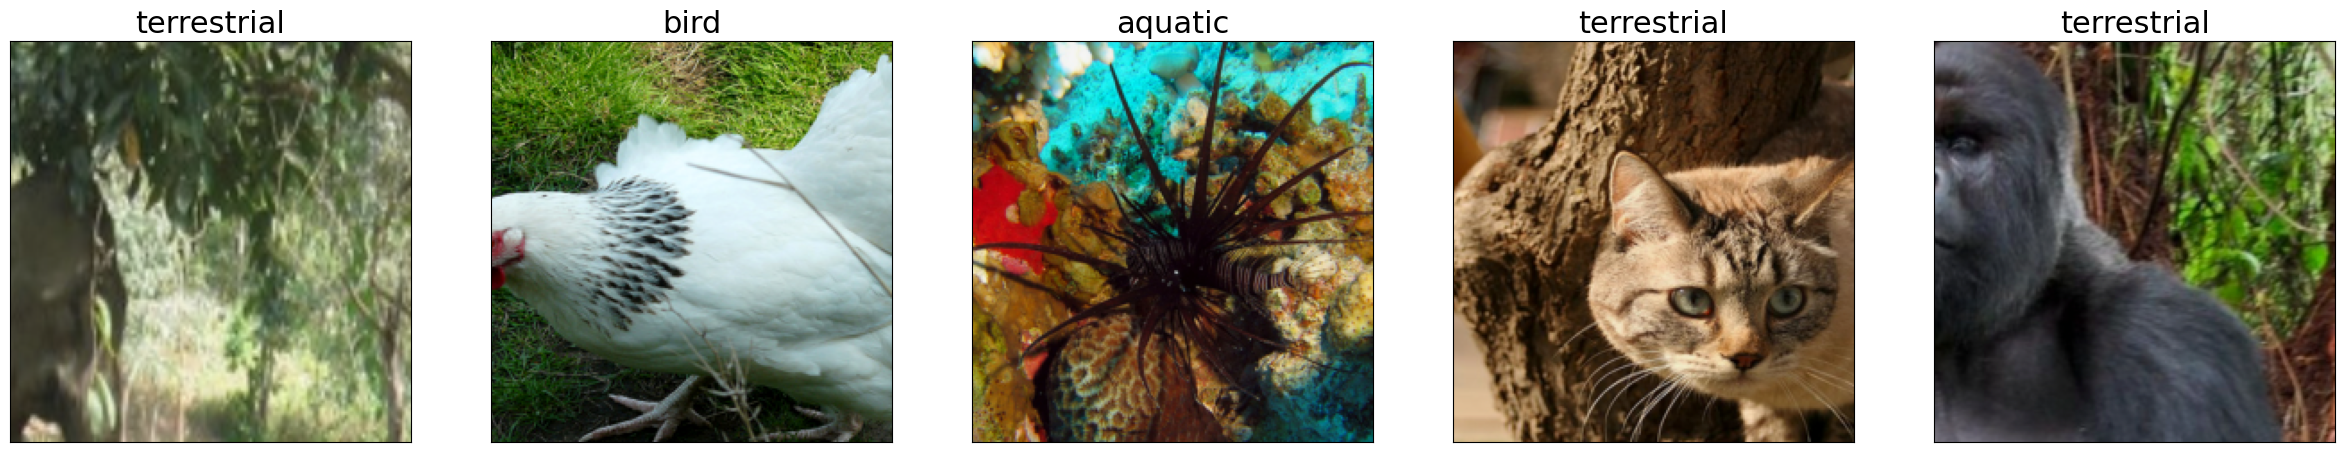

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000758294..1.0010122].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.004129458..1.0042408].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00847503..0.9917251].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0024857689..0.9219796].


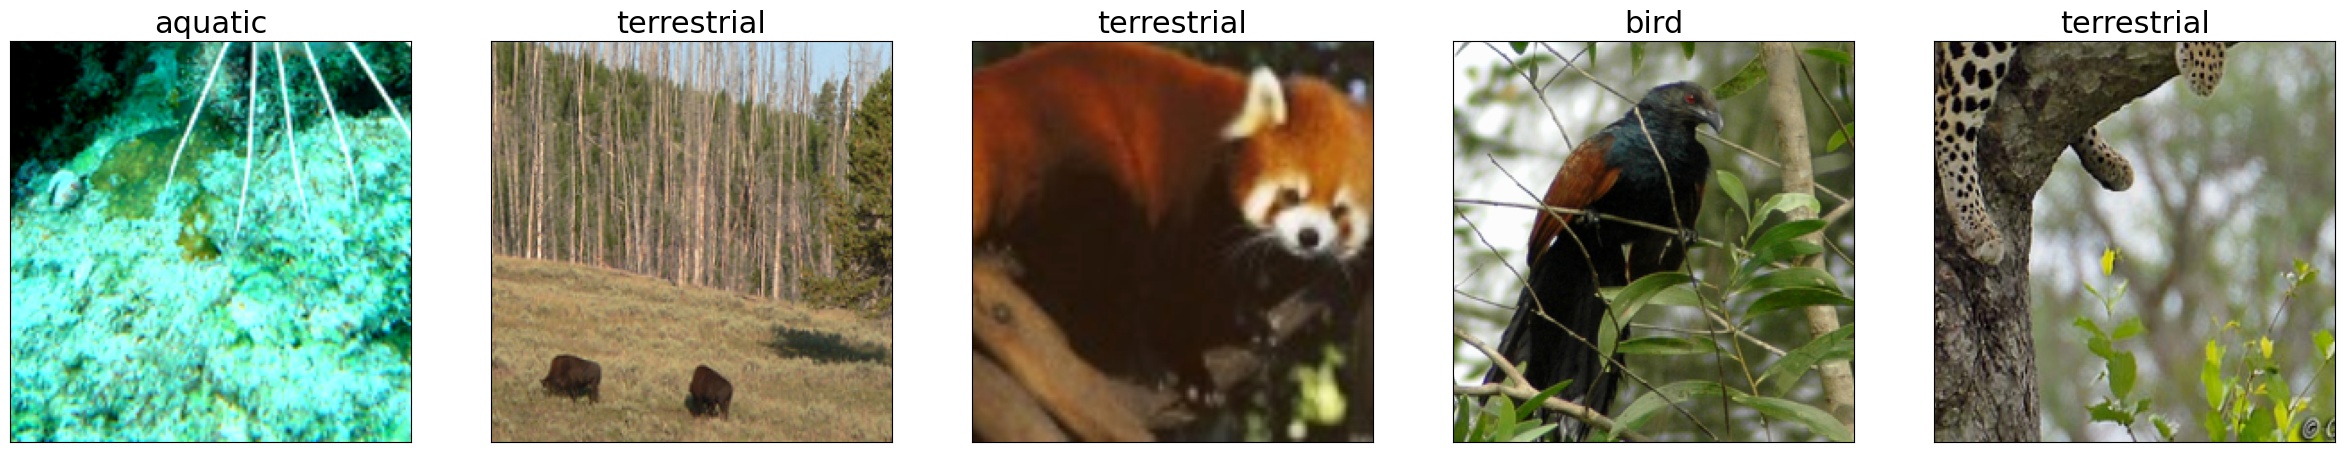

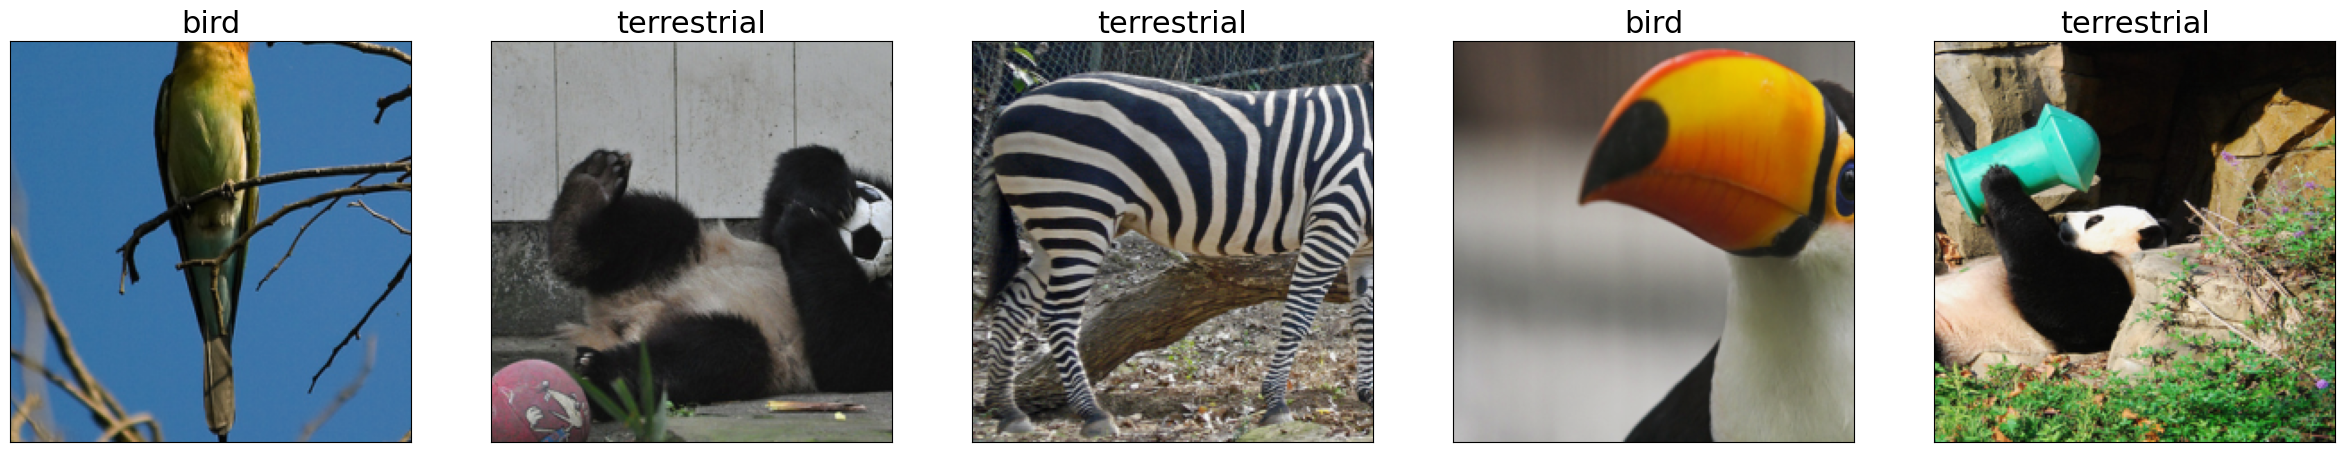

In [31]:
from robustness.tools.vis_tools import show_image_row
%matplotlib inline

iterator = enumerate(train_loader)

for _ in range(5):
    _, (im, lab) = next(iterator)

    show_image_row([im],
                   tlist=[[index_to_superclass[int(k)].split(',')[0] for k in lab]],
                  size=(6, 6),
                  fontsize=22)

In [32]:
import torch

# Sauvegarde des datasets
torch.save(train_loader.dataset, "train_dataset_superclass.pt")
torch.save(test_loader.dataset, "test_dataset_superclass.pt")


In [ ]:
0/0

In [33]:
import torch

# Extraire les images et labels du DataLoader
images_list = []
labels_list = []

for images, labels in train_loader:
    images_list.append(images)
    labels_list.append(labels)

# Convertir en un seul tensor
train_images = torch.cat(images_list)
train_labels = torch.cat(labels_list)

# Sauvegarde des images et labels ensemble
torch.save((train_images, train_labels), "train_dataset_with_images.pt")


RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 20842106880 bytes.